### Data exploration notebook

This notebook will be used for data exploration, representation, and to get a general sense of the content of the dataset.
More info about the dataset can be found in the info.md file, where a general explanation of the dimensions is provided.

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets

In [42]:
def mcol(v):
    return v.reshape((v.size, 1))

def mrow(v):
    return v.reshape((1, v.size))

def compute_mean(X):
    return mcol(X.mean(0))

#### Data loading

Loading the data as column vectors. 

In [43]:
fname = "./data/Train.txt"

def load_set(file_name):
    att_list = []
    class_list = []
    with open(file_name) as train:
        for line in train:
            try:
                attrs = line.split(',')[0:11]
                attrs = mcol(np.array([float(i) for i in attrs]))
                wine_class = line.split(',')[-1].strip('\n')
                att_list.append(attrs)
                np.array(class_list.append(wine_class),  dtype=np.int32)
            except:
                pass
    return np.hstack(att_list), np.hstack(class_list)

def dataset_means(data):
    data_mean  = []
    for i in range(data.shape[0]):
        data_mean.append(compute_mean(data[i, :]))
    return data_mean

A, W_c = load_set(fname) 
W_c = mrow(W_c)
a_mean = dataset_means(A)


#### Data plotting

Plotting singles attributes, along with their mean and color coded for class 0 and 1.

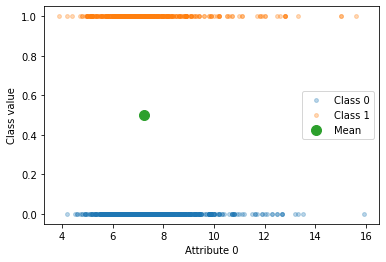

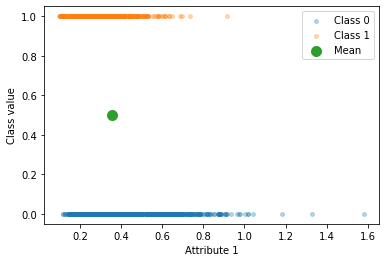

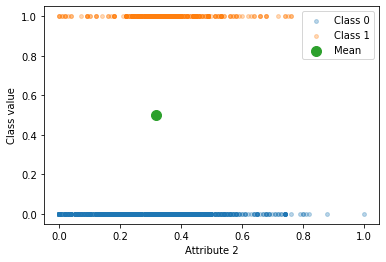

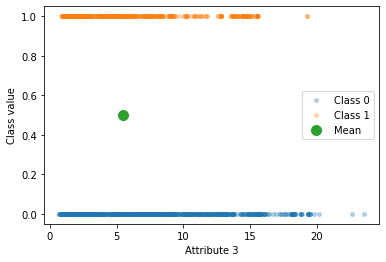

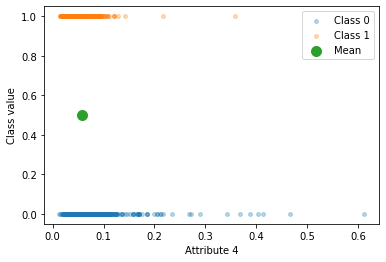

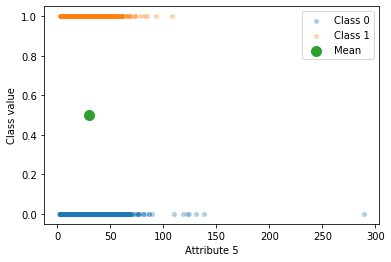

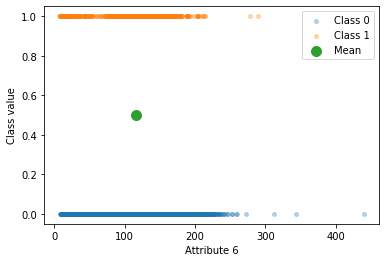

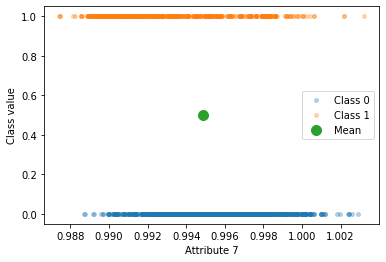

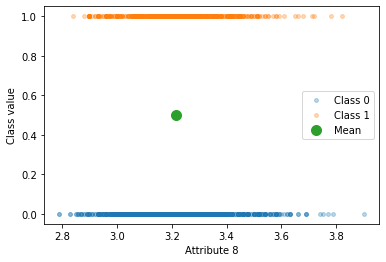

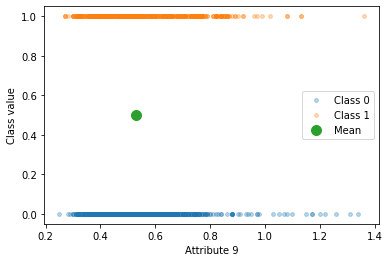

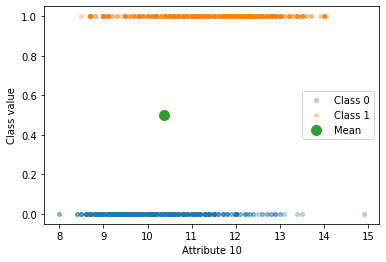

In [44]:
A_0=A[:, W_c[0, :]=='0']
A_1=A[:, W_c[0, :]=='1']
for i in range(A.shape[0]):
    plt.figure()
    plt.xlabel("Attribute %d" % (i))
    plt.ylabel("Class value")
    plt.scatter(A_0[i, :], np.zeros_like(A_0[i, :]), label = 'Class 0', s=15, alpha=0.3)
    plt.scatter(A_1[i, :], np.zeros_like(A_1[i, :])+1, label = 'Class 1', s=15, alpha=0.3)
    plt.scatter(a_mean[i], 0.5, label = 'Mean', s=100)
    plt.legend()